In [5]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [7]:
# individual indexes
x[1], x[3], x[5]

(92, 71, 20)

In [8]:
# once as a list
inds = [1,3,5]
x[inds]

array([92, 71, 20])

In [9]:
x[[1,3,5]]

array([92, 71, 20])

In [10]:
# MD 'multi-dimensional'
inds = np.array([
    [1,2],
    [3,4]
])
x[inds]

array([[92, 14],
       [71, 60]])

In [12]:
y = np.arange(12).reshape((3,4))
y

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
# 1D indexing
y[1,1]
y[0,3]

3

In [22]:
# fancy indexing
rows = np.array([1,2])
cols = np.array([1,2])
y[rows,cols]

array([ 5, 10])

In [24]:
y[rows[:,np.newaxis], cols]

array([[ 5,  6],
       [ 9, 10]])

In [28]:
rows[:, np.newaxis]*cols

array([[1, 2],
       [2, 4]])

In [30]:
# fancy + simple
y[2,[0,1,2]]

array([ 8,  9, 10])

In [31]:
# fancy + slicing
y[1:,[1,2,3]]

array([[ 5,  6,  7],
       [ 9, 10, 11]])

In [34]:
# fancy + masking
mask = np.array([1,0,1,0], dtype=bool)
y[rows[:,np.newaxis], mask]

array([[ 4,  6],
       [ 8, 10]])

In [37]:
""" Selecting Random Points """
mean = [0,0]
cov = [[1,2],
       [2,5]]
a = rand.multivariate_normal(mean,cov,100)
a.shape

(100, 2)

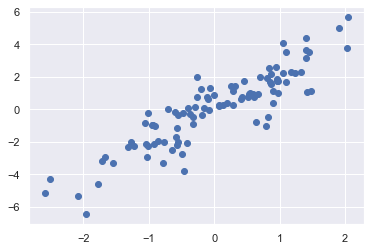

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # foe styling

plt.scatter(a[:,0],a[:,1])

In [53]:
# select random points
points = np.random.choice(a.shape[0], 20, replace=False)
points

array([59, 42, 19, 74, 11,  9, 33, 53, 30, 87, 40, 31, 69, 21, 39, 95, 45,
       89, 73, 77])

In [56]:
sect = a[points]
sect.shape

(20, 2)

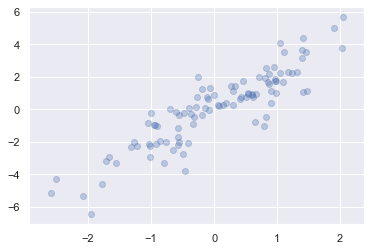

In [62]:
# points visual
plt.scatter(a[:,0], a[:,1], alpha=0.3)
plt.scatter(sect[:,0],sect[:,1], facecolor='none', s=200);



In [65]:
""" Modifying Values with Fancy Indexing """
v = np.arange(10)
print(v)
u = np.array([2,1,8,4])
v[u] = 99
print(v)

[0 1 2 3 4 5 6 7 8 9]
[ 0 99 99  3 99  5  6  7 99  9]


In [66]:
v[u] -= 10
v

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [76]:
# anomaly
z = np.zeros(10)
z[[0,0]] = [4,6]
z

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [82]:
# another one
zz = [2,3,3,4,4,4]
z[zz] += 1
z # notice the anomally

array([6., 0., 6., 6., 6., 0., 0., 0., 0., 0.])

In [87]:
# in order to increment them as required, at() is used
b = np.zeros(10)
np.add.at(b,[0,1,2,3],1)
b

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])

In [92]:
""" Bining Data """

np.random.seed(42)
c = np.random.randn(100)
c

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [93]:
# compute histogram
bins = np.linspace(-5,5,20)
bins

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [94]:
counts = np.zeros_like(bins)
counts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [95]:
# appropriate bin for each x
i = np.searchsorted(bins,c)
i

array([11, 10, 11, 13, 10, 10, 13, 11,  9, 11,  9,  9, 10,  6,  7,  9,  8,
       11,  8,  7, 13, 10, 10,  7,  9, 10,  8, 11,  9,  9,  9, 14, 10,  8,
       12,  8, 10,  6,  7, 10, 11, 10, 10,  9,  7,  9,  9, 12, 11,  7, 11,
        9,  9, 11, 12, 12,  8,  9, 11, 12,  9, 10,  8,  8, 12, 13, 10, 12,
       11,  9, 11, 13, 10, 13,  5, 12, 10,  9, 10,  6, 10, 11, 13,  9,  8,
        9, 12, 11,  9, 11, 10, 12,  9,  9,  9,  7, 11, 10, 10, 10],
      dtype=int64)

In [97]:
# add 1 to the bins
np.add.at(counts,i,1)
counts

array([ 0.,  0.,  0.,  0.,  0.,  2.,  6., 14., 18., 46., 44., 34., 20.,
       14.,  2.,  0.,  0.,  0.,  0.,  0.])

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  


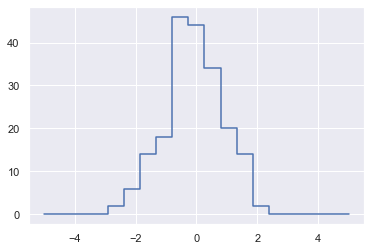

In [101]:
# plot results
plt.plot(bins, counts, linestyle='steps');

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

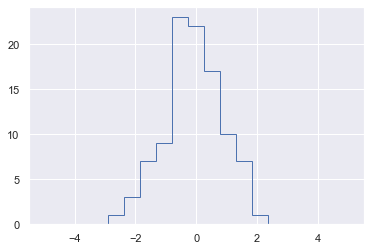

In [103]:
# alternatively
plt.hist(c,bins,histtype='step')